In [4]:
import pandas as pd
tdr=pd.read_csv('tourism_dynamic_routes_1345.csv')
tdr.head()
from Dora import Dora
dora = Dora(output = 0, data = tdr)
dora.data


,Route_ID,User_ID,Sequence,Total_Duration,Total_Cost,Weather,Traffic_Level,Crowd_Density,Event_Impact,Optimal_Route_Preference,Satisfaction_Score,Age,Gender,Nationality,Travel_Companions,Budget_Category,Preferred_Theme,Preferred_Transport
0,1,23,42->32->48->20->29->9,466,1541,Sunny,Medium,Low,Festival,9->20->29->32->42->48,2,61,Other,USA,Family,Low,Relaxation,Taxi
1,2,124,7->44->43->50->30,151,3817,Rainy,High,High,Festival,7->30->43->44->50,4,18,Male,India,Group,High,Shopping,Bus
2,3,135,27->3->32->28->2->36->31,559,8087,Rainy,Low,High,NaN,2->3->27->28->31->32->36,4,68,Male,USA,Group,Medium,Shopping,Walk
3,4,86,38->2->20->19->40->39->29,159,2218,Snowy,Medium,High,Festival,2->19->20->29->38->39->40,4,38,Female,USA,Friends,Low,Adventure,Car
4,5,137,27->24->3,466,1388,Snowy,Low,Medium,Holiday,3->24->27,2,35,Female,China,Solo,High,Cultural,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1341,175,22->17->2->34->39->45->19,505,5698,Snowy,High,Medium,Festival,2->17->19->22->34->39->45,2,46,Female,UK,Family,High,Cultural,Train
1341,1342,9,27->14->41->30->36->22,286,4561,Cloudy,Low,High,NaN,14->22->27->30->36->41,1,53,Female,Japan,Family,High,Shopping,Car
1342,1343,190,31->9->49->17->19,447,8910,Sunny,Medium,High,Holiday,9->17->19->31->49,5,35,Other,Germany,Group,High,Nature,Bus
1343,1344,81,10->18->2->32->20,363,3330,Cloudy,Medium,Low,Festival,2->10->18->20->32,5,64,Female,France,Group,High,Adventure,Train


In [5]:
tdr.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Route_ID                  1345 non-null   int64 
 1   User_ID                   1345 non-null   int64 
 2   Sequence                  1345 non-null   object
 3   Total_Duration            1345 non-null   int64 
 4   Total_Cost                1345 non-null   int64 
 5   Weather                   1345 non-null   object
 6   Traffic_Level             1345 non-null   object
 7   Crowd_Density             1345 non-null   object
 8   Event_Impact              885 non-null    object
 9   Optimal_Route_Preference  1345 non-null   object
 10  Satisfaction_Score        1345 non-null   int64 
 11  Age                       1345 non-null   int64 
 12  Gender                    1345 non-null   object
 13  Nationality               1345 non-null   object
 14  Travel_Companions       

In [6]:
for dtype in ['int','object']:
    selected_dtype = tdr.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))    
    

Average memory usage for int columns: 0.01 MB
Average memory usage for object columns: 0.07 MB


In [7]:
import numpy as np
int_types = ["uint8", "int8", "int16", "int32", "int64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



In [8]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: #we assume if not a tdr it`s a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2    
    return round(usage_mb, 2)
        



In [9]:
tdr_int = tdr.select_dtypes(include=['int'])
converted_int = tdr_int.apply(pd.to_numeric,downcast='unsigned')
print("Before: ", mem_usage(tdr_int))
print("After: ", mem_usage(converted_int))
compare_ints = pd.concat([tdr_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

Before:  0.06
After:  0.01


,before,after
uint8,NaN,3.0
uint16,NaN,3.0
int64,6.0,NaN


In [20]:
optimized_tdr = tdr.copy()
optimized_tdr[converted_int.columns] = converted_int
print(mem_usage(tdr))
print(mem_usage(optimized_tdr))

0.92
0.87


In [11]:
tdr_obj = tdr.select_dtypes(include=['object']).copy()
tdr_obj.describe()


,Sequence,Weather,Traffic_Level,Crowd_Density,Event_Impact,Optimal_Route_Preference,Gender,Nationality,Travel_Companions,Budget_Category,Preferred_Theme,Preferred_Transport
count,1345,1345,1345,1345,885,1345,1345,1345,1345,1345,1345,1345
unique,1344,4,3,3,2,1343,3,7,4,3,6,6
top,34->42->10,Rainy,Low,Medium,Festival,10->34->42,Male,USA,Friends,Medium,Food,Train
freq,2,358,465,478,462,2,508,227,398,486,317,311


In [12]:
tr_level = tdr_obj["Traffic_Level"]
print(tr_level.head())
tr_level_cat = tr_level.astype('category')
print(tr_level_cat.head())

0    Medium
1      High
2       Low
3    Medium
4       Low
Name: Traffic_Level, dtype: object
0    Medium
1      High
2       Low
3    Medium
4       Low
Name: Traffic_Level, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']


In [13]:
tr_level_cat.head().cat.codes

0    2
1    0
2    1
3    2
4    1
dtype: int8

In [14]:
print(mem_usage(tr_level))
print(mem_usage(tr_level_cat))

0.07
0.0


In [34]:
ev = tdr_obj["Event_Impact"]
print(optr.head())
ev_cat = optr.astype('category')
print(ev_cat.head())

0        9->20->29->32->42->48
1            7->30->43->44->50
2     2->3->27->28->31->32->36
3    2->19->20->29->38->39->40
4                    3->24->27
Name: Optimal_Route_Preference, dtype: object
0        9->20->29->32->42->48
1            7->30->43->44->50
2     2->3->27->28->31->32->36
3    2->19->20->29->38->39->40
4                    3->24->27
Name: Optimal_Route_Preference, dtype: category
Categories (1343, object): ['1->10->14->36->50', '1->10->16->26->48->50', '1->10->25->45->47', '1->10->27->31->46', ..., '9->34->39', '9->36->42->49->50', '9->44->45->48', '9->48->49']


In [35]:
ev_cat.head().cat.codes

0    1328
1    1186
2     571
3     550
4     785
dtype: int16

In [36]:
print(mem_usage(ev))
print(mem_usage(ev_cat))

0.06
0.12


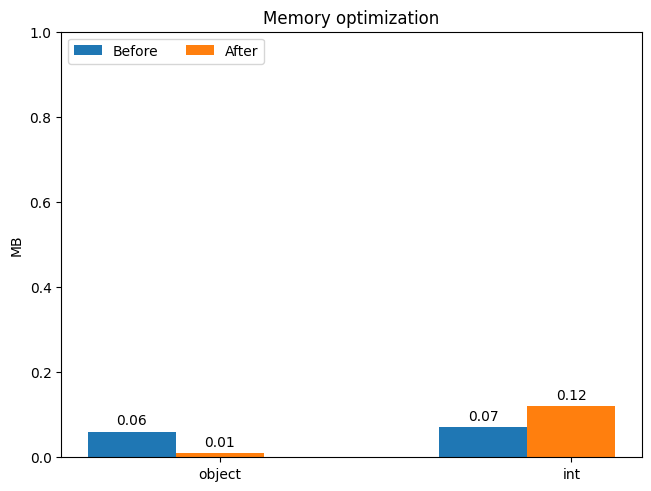

In [51]:
import matplotlib.pyplot as plt
import numpy as np   
species = ("object", "int")
penguin_means = {
       'Before': (mem_usage(tdr_int), mem_usage(tr_level)),
       'After': (mem_usage(converted_int), round(mem_usage(tr_level_cat)+mem_usage(optr_cat), 2))
}
x = np. arange(len(species))
width = 0.25
multiplier = 0
fig, ax = plt. subplots(layout='constrained')
for attribute, measurement in penguin_means.items():   
    offset = width * multiplier
    rects = ax.bar(x + offset,measurement, width, label=attribute)
    ax. bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('MB' )
ax.set_title( 'Memory optimization')
ax.set_xticks(x + width, species)
ax. legend(loc='upper left' , ncols=3)
ax.set_ylim(0, 1)
plt.show()